Predict the Gold price base on other saveral stock pricess.
The Stocks
SPX,
USO,
SLV


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
gold_data=pd.read_csv("gld_price_data.csv")

In [3]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [7]:
gold_data.head(50)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [5]:

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.isnull().sum() #not include missing values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#getting the statistical mean median etc
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#correlation 
1.positive 1 var increase the other increase
2.negative 1 var increase the other deccreses


In [9]:
correlation=gold_data.corr()

<AxesSubplot:>

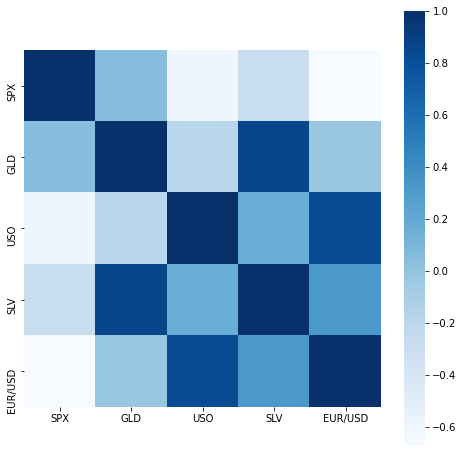

In [10]:
#constructing heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [11]:
#correlation values of  GLD
print(correlation['GLD'])  #SPX top 500 compinies stocks
                            #

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

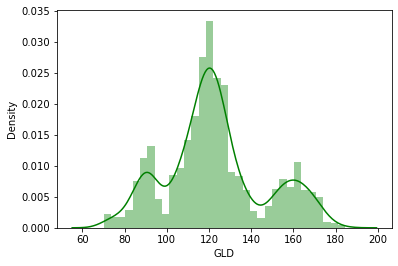

In [12]:
#CHECK THE DISTRIBUTION OF THE GOLD PRICE 
sns.distplot(gold_data['GLD'],color='green')

In [13]:
#spliting the feaetures and target  #axis =0 when droping the row
X=gold_data.drop(['Date','GLD'],axis=1) #axis =1 when dropring col


In [14]:
X #ONLY FEATURES STOCK PRICE....

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
Y=gold_data['GLD']


In [16]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Splitting into trining data and test data 

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [18]:
print(f'X_train shape : {X_train.shape}')
print(f'Y_train shape : {Y_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'Y_test shape : {Y_test.shape}')

X_train shape : (1832, 4)
Y_train shape : (1832,)
X_test shape : (458, 4)
Y_test shape : (458,)


In [53]:
X_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [54]:
Y_train

476     109.879997
1958    115.540001
248      90.930000
2231    125.370003
1325    119.889999
           ...    
1071    169.610001
433     109.800003
674     129.869995
1099    159.429993
1608    115.139999
Name: GLD, Length: 1832, dtype: float64

model training
random forest regressor


In [55]:
regressor=RandomForestRegressor(n_estimators=100)
 

In [56]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

#model evaluation

In [57]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [58]:
print(test_data_prediction)

[168.73999956  81.88049993 116.13430009 127.66340096 120.90950098
 154.78169691 150.25399929 126.11980036 117.52069839 126.04630066
 116.63690134 171.77810074 141.63819887 167.83029816 115.25069969
 117.71300067 139.75600313 170.11690085 158.82140328 157.20920003
 155.1912005  125.10430029 176.6348994  156.96130387 125.22850027
  93.76619964  77.4254     120.23510001 118.98029893 167.52359941
  88.15860061 125.14639954  91.02370071 117.56950057 121.23909928
 136.16760137 115.33330124 115.34860098 147.94229965 106.799401
 104.53910251  87.04849794 126.47900068 118.0274997  154.03459965
 119.62470017 108.40209998 107.96979849  93.24490073 127.23909741
  74.73640061 113.68779923 121.50490021 111.25619901 118.81719885
 120.32399943 159.72699928 168.12300169 146.75729689  86.02659875
  94.29410043  86.97769902  90.5803001  118.98790064 126.45350038
 127.46680012 170.36520056 122.30939924 117.44109873  98.54539982
 167.28960075 142.79209861 132.26870329 121.16640237 120.77359937
 119.6009006

#comparing
#RS ERROR


In [59]:
from sklearn import metrics
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [60]:

 print("R squared error :",error_score)


R squared error : 0.9893689739938332


Compare the actual values and predicted values in a plot

In [61]:
Y_test=list(Y_test)

compare the Actual and presicted value

the values are very close to each other
actual value are slightly more then the predicted values
this is the error.

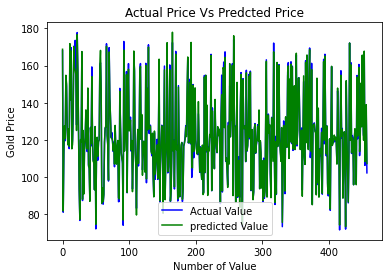

In [62]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='predicted Value')
plt.title('Actual Price Vs Predcted Price')
plt.xlabel('Number of Value')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [28]:
#prediction on test data
#regressor.predict([[1200,12.4,23.4,1.2]])

In [63]:
import pickle

# save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(regressor, file)


In [2]:
import pickle
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [3]:
model.predict([[1200,12.4,23.4,1.2]])


array([141.79659855])

The R2 score is a measure of how well the model fits the data
regression problem with 4 input features, 1832 training examples, and 458 test examples
.model has an R2 score of 0.989 on the training data, it means that the model explains 98.9% of the variability in the target variable based on the input features. 

In [70]:
print("R squared error is : ", metrics.r2_score(Y_test,y_pred))

R squared error is :  0.9893689739938332
